In [1]:
import pandas as pd
import numpy as np

In [687]:
import matplotlib.pyplot as plt
import seaborn as SNS
%matplotlib inline

In [6]:
orders = pd.read_csv('data\orders.csv', sep = ';')
items = pd.read_csv('data\items.csv', sep = ';')


In [45]:
orders

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,channel,owner,site,CreatedAt
0,2000093387,2020-04-24,GOPAY_CARD,S101,1,NaN,3.506048,0.000000,3.496395,E-COMMER,RUN.huC,RUN.huO,top4running.hu,2020-04-24 21:50:00
1,2000093387,2020-04-24,GOPAY_CARD,S113,1,NaN,-0.705913,0.000000,-0.717209,E-COMMER,RUN.huC,RUN.huO,top4running.hu,2020-04-24 21:50:00
2,2000093388,2020-04-24,COD,ZB00089178,1,NaN,5.829845,2.209302,6.472868,E-COMMER,FTB.czC,FTB.czO,11teamsports.cz,2020-04-24 21:45:00
3,2000093388,2020-04-24,COD,ZB00138060,1,NaN,5.829845,2.209302,6.472868,E-COMMER,FTB.czC,FTB.czO,11teamsports.cz,2020-04-24 21:45:00
4,2000093388,2020-04-24,COD,ZB00015664,1,NaN,19.379845,18.731008,32.015504,E-COMMER,FTB.czC,FTB.czO,11teamsports.cz,2020-04-24 21:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128519,521008740,2021-10-11,ZALOHA,S121,1,NaN,0.028682,0.000000,NaN,E-COMMER,ECOMothC,ECOMothO,other,2021-10-11 14:10:00
2128520,521009376,2021-10-26,DOBIRKA,S121,1,NaN,0.030620,0.000000,NaN,E-COMMER,ECOMothC,ECOMothO,other,2021-10-26 21:04:00
2128521,521009994,2021-11-11,ZALOHA,S121,1,NaN,0.022481,0.000000,NaN,E-COMMER,ECOMothC,ECOMothO,other,2021-11-11 13:03:00
2128522,521011437,2021-12-23,ZALOHA,S121,1,NaN,0.005039,0.000000,0.000000,E-COMMER,ECOMothC,ECOMothO,other,2021-12-23 15:58:00


In [84]:
orders[orders['payment'].isna()]

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,channel,owner,site,CreatedAt
138419,1170243720,2021-07-12,NaN,ZB00209002,1,NaN,73.963566,53.631395,NaN,E-COMMER,RUN.czC,RUN.czO,top4running.cz,2021-07-12 10:40:00
138420,1170259775,2021-07-26,NaN,S121,1,NaN,0.009942,0.000000,NaN,E-COMMER,ECOMothC,ECOMothO,other,2021-07-26 11:45:00
138421,1170261413,2021-07-27,NaN,S121,1,NaN,0.009934,0.000000,NaN,E-COMMER,ECOMothC,ECOMothO,other,2021-07-27 13:18:00
138422,1170264127,2021-07-29,NaN,S121,1,NaN,0.009932,0.000000,NaN,E-COMMER,ECOMothC,ECOMothO,other,2021-07-29 20:21:00
2127902,2200023870,2022-01-14,NaN,ZB00141834,1,NaN,72.508064,90.455814,161.065116,E-COMMER,RUN.roC,RUN.roO,top4running.ro,2022-01-14 06:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128460,2200024147,2022-01-14,NaN,ZB00300051,1,NaN,39.315228,24.031008,49.661744,E-COMMER,11TS.roC,11TS.roO,11teamsports.ro,2022-01-14 11:00:00
2128461,2200024147,2022-01-14,NaN,S113,1,NaN,0.805326,0.000000,0.766977,E-COMMER,11TS.roC,11TS.roO,11teamsports.ro,2022-01-14 11:00:00
2128462,2200024148,2022-01-14,NaN,ZB00249998,1,NaN,16.270529,13.979845,22.824806,E-COMMER,11TS.huC,11TS.huO,11teamsports.hu,2022-01-14 11:01:00
2128463,2200024148,2022-01-14,NaN,S101,1,NaN,2.054575,0.000000,2.055814,E-COMMER,11TS.huC,11TS.huO,11teamsports.hu,2022-01-14 11:01:00


In [79]:
orders[orders['order_id'] ==  2000115983]

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,channel,owner,site,CreatedAt
53244,2000115983,2020-05-21,CARD_GOPAY,ZB00116854,1,NaN,63.174054,34.224806,70.201663,E-COMMER,RUN.esC,RUN.esO,top4running.es,2020-05-21 13:11:00
53245,2000115983,2020-05-21,CARD_GOPAY,ZB00116863,1,NaN,86.021756,47.386047,96.568484,E-COMMER,RUN.esC,RUN.esO,top4running.es,2020-05-21 13:11:00
53246,2000115983,2020-05-21,CARD_GOPAY,ZB00116785,1,NaN,20.125965,10.671705,21.880209,E-COMMER,RUN.esC,RUN.esO,top4running.es,2020-05-21 13:11:00
53247,2000115983,2020-05-21,CARD_GOPAY,ZB00116805,1,NaN,35.063620,18.751550,39.454546,E-COMMER,RUN.esC,RUN.esO,top4running.es,2020-05-21 13:11:00
53248,2000115983,2020-05-21,CARD_GOPAY,ZB00009585,1,NaN,0.000000,9.870543,26.271136,E-COMMER,RUN.esC,RUN.esO,top4running.es,2020-05-21 13:11:00


In [77]:
orders[orders['unit_price_vat_excl']  ==  0]

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,channel,owner,site,CreatedAt
53248,2000115983,2020-05-21,CARD_GOPAY,ZB00009585,1,NaN,0.0,9.870543,26.271136,E-COMMER,RUN.esC,RUN.esO,top4running.es,2020-05-21 13:11:00
452360,1900249872,2019-12-19,COD,ZB00009581,1,NaN,0.0,9.845349,25.581395,E-COMMER,RUN.czC,RUN.czO,top4running.cz,2019-12-19 15:25:00
455569,1900252171,2019-12-23,COD,ZB00009581,1,NaN,0.0,9.845349,25.581395,E-COMMER,FTB.czC,FTB.czO,11teamsports.cz,2019-12-23 14:20:00
568566,2000065688,2020-03-17,GOPAY_CARD,S113,1,NaN,0.0,0.000000,-0.727442,E-COMMER,RUN.huC,RUN.huO,top4running.hu,2020-03-17 16:45:00
607782,2000085439,2020-04-15,COD,ZB00097806,1,NaN,0.0,5.000000,11.842054,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2020-04-15 10:50:00
971274,2000330761,2020-12-11,COD,ZB00112713,1,NaN,0.0,8.628682,21.156153,E-COMMER,RUN.skC,RUN.skO,top4running.sk,2020-12-11 17:06:00
1263902,2100135401,2021-04-02,PAYPAL,ZB00203617,1,NaN,0.0,8.233333,9.938587,E-COMMER,FIT.itC,FIT.itO,top4fitness.it,2021-04-02 09:20:00
1279374,2100143637,2021-04-07,BANK_TRANSFER,ZB00206667,1,NaN,0.0,6.232558,10.359419,E-COMMER,FIT.deC,FIT.deO,top4fitness.de,2021-04-07 13:26:00
1713058,2100386238,2021-09-29,GOPAY_CARD,S114,-1,NaN,0.0,0.000000,0.000000,E-COMMER,RUN.czC,RUN.czO,top4running.cz,2021-09-29 11:45:00
2128477,520002223,2020-04-27,ZAPOCET,S121,1,NaN,0.0,0.000000,0.000000,E-COMMER,ECOMothC,ECOMothO,other,2020-04-27 21:19:00


In [72]:
orders[orders['item_code'] =='ZB00186641']

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,channel,owner,site,CreatedAt


In [44]:
orders['date']=  pd.to_datetime(orders['date'])

In [34]:
orders['department'].value_counts()

E-COMMER    2128524
Name: department, dtype: int64

In [22]:
orders.dtypes

order_id                 int64
date                    object
payment                 object
item_code               object
quantity                 int64
gift_quantity          float64
unit_price_vat_excl    float64
unit_cogs              float64
unit_rrp_vat_excl      float64
department              object
channel                 object
owner                   object
site                    object
CreatedAt               object
dtype: object

In [ ]:
col_drop = ['department']

In [ ]:
orders[]

In [11]:
orders.describe()

,order_id,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl
count,2.128524e+06,2.128524e+06,10390.000000,2.128524e+06,2.128524e+06,2.128426e+06
mean,2.039053e+09,1.029551e+00,1.000192,3.102203e+01,1.903846e+01,3.942803e+01
std,7.691450e+07,5.852888e-01,0.019621,4.066967e+01,2.665736e+01,5.013470e+01
min,2.000000e+07,-1.000000e+00,1.000000,-1.859721e+00,0.000000e+00,-1.771163e+00
25%,2.000112e+09,1.000000e+00,1.000000,2.551573e+00,0.000000e+00,2.613605e+00
50%,2.100026e+09,1.000000e+00,1.000000,1.442870e+01,7.829457e+00,2.034849e+01
75%,2.100322e+09,1.000000e+00,1.000000,4.481395e+01,2.871260e+01,5.810465e+01
max,2.200024e+09,1.360000e+02,3.000000,7.203857e+02,2.440504e+03,7.444543e+02


In [78]:
items[items['item_code'] == 'ZB00009585']

,item_code,item_name,style,brand_id,name,group0_id,group0,group1_id,group1,group2_id,group2,category,gender,age,color,size
275440,ZB00009585,NK ACDMY TEAM M DUFF,ba5504-657,84,Nike,300.0,Equipment,305.0,Bags,0.0,NaN,football,unisex,adults,Red,ks


In [67]:
items[items['brand_id'] == -1]

,item_code,item_name,style,brand_id,name,group0_id,group0,group1_id,group1,group2_id,group2,category,gender,age,color,size
12505,ZB00000222,Xfer Montecarlo,NaN,-1,- žádný výrobce -,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12661,ZB00000224,"Multifunkcní batoh Hamelin, cerná",NaN,-1,- žádný výrobce -,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13255,ZB00000221,Xfer Montecarlo,NaN,-1,- žádný výrobce -,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16808,ZB00000223,Xfer Montecarlo,NaN,-1,- žádný výrobce -,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50614,ZB00186641,DYNABLAST,NaN,-1,- žádný výrobce -,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309123,ZB00073434,NaN,NaN,-1,- žádný výrobce -,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309124,ZB00075104,NaN,NaN,-1,- žádný výrobce -,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309125,ZB00073523,NaN,NaN,-1,- žádný výrobce -,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309126,ZB00165469,NaN,NaN,-1,- žádný výrobce -,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
stags = [x for x in items['item_code'].unique() if str(x).startswith('S')]

In [48]:
items[items.item_code.isin(stags) == True]['item_name'].to_list()


['Footscan',
 'Poukaz_uplatnení',
 'Prefakturace',
 'Zboží mimo sklad',
 'Prodej DHM',
 'Marketingový príspevek_fa pred',
 'Výšivka - (písmeno, císlo) - cena za 1 znak',
 'Tisk - Jmenovka - cena za jmenovku',
 'Korekce DPH',
 'Služby - vnitro',
 'Expresní vrácení penez',
 'Dopravné',
 'Výšivka - (vlajka, spec. znak) - cena za 1 znak',
 'Bonusy',
 'Termolis Transmatic TS-3M 40x50 cm',
 'Náhrada škody',
 'Potisk',
 'Tisk - Císlice - cena za 1 císlici',
 'Prodej majetku',
 'Zaokrouhlení',
 'Platba',
 'Vltava Run',
 'Handling fee 2%',
 'Zboží s výdejkou',
 'Náhrada škody',
 'XXX',
 'Premístení obchodního majetku',
 'Prodloužená doba na vrácení',
 'Doprava vratky',
 'Prodej majetku',
 'Marketingová podpora',
 'Zarízení prodejny Grosslingova',
 'Sleva',
 'Osobní odber',
 'Tisk - Speciál',
 'Bonus']

In [29]:
sales = pd.merge(orders,items,on='item_code',how='left')

In [80]:
sales['date']=  pd.to_datetime(sales['date'])

In [698]:
sales_clean['group0_id'].value_counts()

200.0    697004
100.0    517700
300.0    138771
400.0      4341
0.0         388
999.0        22
Name: group0_id, dtype: int64

In [706]:
sales_clean[sales_clean['group0_id']==0]['name'].value_counts()

Under Armour        78
Nike                70
adidas              67
Puma                43
adidas Originals    37
New Balance         12
Craft               12
Jordan              10
INOV-8               9
New Era              7
On Running           6
Falke                6
Jako                 5
Reebok Classic       5
KEEPERsport          4
Erima                2
Mizuno               2
Hoka One One         2
Uhlsport             2
adidas Core          2
CR7                  2
Reusch               1
Carhart WIP          1
Lotto                1
Converse             1
Asics                1
Name: name, dtype: int64

In [55]:
sales.isna().any()

order_id               False
date                   False
payment                 True
item_code              False
quantity               False
gift_quantity           True
unit_price_vat_excl    False
unit_cogs              False
unit_rrp_vat_excl       True
department             False
channel                False
owner                  False
site                   False
CreatedAt              False
item_name               True
style                   True
brand_id               False
name                   False
group0_id               True
group0                  True
group1_id               True
group1                  True
group2_id               True
group2                  True
category                True
gender                  True
age                     True
color                   True
size                    True
dtype: bool

In [369]:
sales.head()

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,...,group0,group1_id,group1,group2_id,group2,category,gender,age,color,size
0,2000093387,2020-04-24,GOPAY_CARD,S101,1,NaN,3.506048,0.000000,3.496395,E-COMMER,...,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000093387,2020-04-24,GOPAY_CARD,S113,1,NaN,-0.705913,0.000000,-0.717209,E-COMMER,...,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000093388,2020-04-24,COD,ZB00089178,1,NaN,5.829845,2.209302,6.472868,E-COMMER,...,Apparel,290.0,Socks,291.0,Football socks,football,unisex,adults,Silver,3
3,2000093388,2020-04-24,COD,ZB00138060,1,NaN,5.829845,2.209302,6.472868,E-COMMER,...,Apparel,290.0,Socks,291.0,Football socks,football,unisex,adults,Pink,39-42
4,2000093388,2020-04-24,COD,ZB00015664,1,NaN,19.379845,18.731008,32.015504,E-COMMER,...,Apparel,240.0,Pants,0.0,NaN,fitness,men,adults,Black,XXL


In [371]:
sales['sales'] = sales['unit_price_vat_excl']* sales['quantity']

In [116]:
sales_clean = sales[sales['brand_id']!=-1]

In [117]:
sales_clean = sales_clean[sales_clean['payment'].notna()]

In [118]:
sales_clean.isna().any()

order_id               False
date                   False
payment                False
item_code              False
quantity               False
gift_quantity           True
unit_price_vat_excl    False
unit_cogs              False
unit_rrp_vat_excl       True
department             False
channel                False
owner                  False
site                   False
CreatedAt              False
item_name               True
style                  False
brand_id               False
name                   False
group0_id              False
group0                  True
group1_id               True
group1                  True
group2_id               True
group2                  True
category                True
gender                  True
age                     True
color                   True
size                    True
dtype: bool

In [120]:
sales_clean[sales_clean['item_name'].isna()]

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,...,group0,group1_id,group1,group2_id,group2,category,gender,age,color,size
163868,1900092396,2019-07-01,COD,ZB00002126,1,NaN,25.465891,18.507752,50.932170,E-COMMER,...,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184941,1900102020,2019-07-16,COD,ZB00002126,1,NaN,22.208837,18.507752,44.393728,E-COMMER,...,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194446,1900106546,2019-07-24,CARD_CSOB,ZB00063323,1,NaN,25.465891,43.139535,50.932170,E-COMMER,...,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256342,1900138282,2019-09-02,COD,ZB00002126,1,NaN,25.111434,18.507752,52.653655,E-COMMER,...,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#sales_clean = sales_clean.set_index(sales_clean['date'])

In [129]:
sales_clean['sales'] = sales_clean['unit_price_vat_excl']* sales_clean['quantity']
sales_clean['profit'] = (sales_clean['unit_price_vat_excl'] - sales_clean['unit_cogs'])* sales_clean['quantity']

In [130]:
daily_sales_df = sales_clean.groupby(sales_clean.date.dt.date).sum()

In [141]:
daily_sales_df

,order_id,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,brand_id,group0_id,group1_id,group2_id,sales
date,,,,,,,,,,,
2019-06-01,174807135574,131,0.0,3386.668914,1943.867829,4802.900742,8580,17100.0,19842.0,8259.0,4087.236534
2019-06-02,7600325148,4,0.0,65.848327,41.049612,81.711612,336,1100.0,1437.0,242.0,65.848327
2019-06-03,58902530869,36,0.0,1305.135880,818.720543,1869.291068,3108,5400.0,6808.0,2377.0,1364.979529
2019-06-04,3047729307572,1609,0.0,68306.862237,42058.382946,53405.963642,147880,293800.0,348552.0,97504.0,68385.521621
2019-06-05,3091431728175,1757,0.0,63227.232931,20083.223643,18.309209,144496,289000.0,345566.0,100356.0,65135.657001
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,5086439847349,2562,0.0,104633.721805,67683.668217,131680.958267,227728,398300.0,464406.0,131307.0,107064.467839
2022-01-11,5077644238658,2514,0.0,108267.338998,71173.646899,138674.027824,223491,384800.0,447331.0,133967.0,110698.874419
2022-01-12,4820246137483,2483,1.0,97588.388341,64159.694186,125172.268256,215217,373800.0,427707.0,123845.0,100503.117963


In [124]:
daily_sales_df['quantity'].describe()

count     958.000000
mean     1516.028184
std       787.036530
min         3.000000
25%       977.000000
50%      1308.500000
75%      1880.250000
max      5638.000000
Name: quantity, dtype: float64

C:\Users\Alex\AppData\Local\Temp\ipykernel_116004\4033153309.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekly_sales = sales_clean.groupby(sales_clean.date.dt.week)['sales'].sum()


In [136]:
daily_sales= daily_sales.reset_index(drop=True)

In [105]:
from prophet import Prophet


In [155]:
pdf= pd.DataFrame()

In [164]:
pdf['y'] = daily_sales_df['sales']

In [168]:
pdf= pdf.reset_index()

In [398]:
pdf

,ds,y
0,2019-06-01,4087.236534
1,2019-06-02,65.848327
2,2019-06-03,1364.979529
3,2019-06-04,68385.521621
4,2019-06-05,65135.657001
...,...,...
953,2022-01-10,107064.467839
954,2022-01-11,110698.874419
955,2022-01-12,100503.117963
956,2022-01-13,97576.039846


In [461]:
pdf.loc[270:320]

,ds,y
270,2020-02-27,38907.908799
271,2020-02-28,37463.688605
272,2020-02-29,41823.518032
273,2020-03-01,52172.637797
274,2020-03-02,54903.244607
275,2020-03-03,57237.116493
276,2020-03-04,47415.533617
277,2020-03-05,51872.324692
278,2020-03-06,41174.147316
279,2020-03-07,42821.862597


In [188]:
pdf = pdf.rename(columns = {'date':'ds'})

In [773]:
pdf.sort_values('y', ascending=False).tail(50)

,ds,y
202,2019-12-21,26807.565001
117,2019-09-27,26755.499082
299,2020-03-27,26684.760448
206,2019-12-25,26618.297777
203,2019-12-22,26452.344724
145,2019-10-25,26430.348996
148,2019-10-28,26037.234631
294,2020-03-22,25807.650924
290,2020-03-18,25310.356502
292,2020-03-20,25307.368703


In [756]:
#remove outliers
pdfor = pdf.drop(index=[366,468,774,314,957]) #180
pdfor = pdfor[30:]
pdfor['ds']=  pd.to_datetime(pdfor['ds'])
pdfor = pdfor.reset_index(drop=True)

In [536]:
trainlen = int(len(pdfor)*.85)

In [757]:
train = pdfor[:-30]
test = pdfor[-30:]

In [322]:
#m = Prophet(interval_width=0.95, changepoint_prior_scale=.01, seasonality_prior_scale=0.1)

In [561]:
covid_data = pd.read_csv('data\owid-covid-data.csv')

In [566]:
covid_data = covid_data[covid_data['iso_code'] == 'CZE']

In [591]:
restriction_index = pd.DataFrame()
restriction_index = covid_data[['date','stringency_index']]

In [577]:
restriction_index

,date,stringency_index
49132,2020-03-01,19.44
49133,2020-03-02,19.44
49134,2020-03-03,19.44
49135,2020-03-04,19.44
49136,2020-03-05,19.44
...,...,...
50048,2022-09-03,NaN
50049,2022-09-04,NaN
50050,2022-09-05,NaN
50051,2022-09-06,NaN


In [571]:
restriction_index.describe()

,stringency_index
count,885.000000
mean,45.899164
std,19.931054
min,14.810000
25%,36.110000
50%,41.670000
75%,62.040000
max,82.410000


In [686]:
restriction_index = pd.DataFrame()
restriction_index = covid_data[['date','stringency_index']]
#restriction_index['stringency_index'] = (restriction_index['stringency_index']/82.410000)
restriction_index = restriction_index.rename(columns = {'date':'ds'})
restriction_index['ds']=  pd.to_datetime(restriction_index['ds'])

In [670]:
pdforres = pd.merge(pdfor,restriction_index,on='ds',how='left')
pdforres = pdforres.fillna(0)

In [671]:
pdforres

,ds,y,stringency_index
0,2019-07-02,29825.892188,0.000000
1,2019-07-03,30148.139918,0.000000
2,2019-07-04,28886.698448,0.000000
3,2019-07-05,29277.998737,0.000000
4,2019-07-06,21320.833411,0.000000
...,...,...,...
917,2022-01-09,101228.700023,0.458197
918,2022-01-10,107064.467839,0.458075
919,2022-01-11,110698.874419,0.458075
920,2022-01-12,100503.117963,0.457954


In [627]:
pdforres[500:550]

,ds,y,stringency_index
500,2020-11-17,120850.312928,0.887635
501,2020-11-18,103450.773165,0.842616
502,2020-11-19,101211.700032,0.842616
503,2020-11-20,102077.630904,0.842616
504,2020-11-21,109864.106148,0.842616
505,2020-11-22,133411.983986,0.842616
506,2020-11-23,114278.873979,0.842616
507,2020-11-24,116641.916537,0.842616
508,2020-11-25,130446.621684,0.842616
509,2020-11-26,122405.704770,0.842616


In [758]:
nye = pd.DataFrame({
  'holiday': 'nye',
  'ds': pd.to_datetime(['2019-12-31', '2020-12-31','2021-12-31','2022-12-31']),
  'lower_window': 0,
  'upper_window': 0,
})
covid_lockdown = pd.DataFrame({
  'holiday': 'covid_lockdown',
  'ds': pd.date_range('2020-03-12','2020-04-13'),
  'lower_window': 0,
  'upper_window': 0,
})
holidays = pd.concat((nye, covid_lockdown))

In [759]:
#'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.05, 'holidays_prior_scale': 0.5}
m = Prophet(holidays = holidays, interval_width=0.95, changepoint_prior_scale=.01, holidays_prior_scale = 0.5, seasonality_prior_scale=0.05, seasonality_mode = "multiplicative") #holidays_prior_scale = 1
m.add_country_holidays(country_name='CZ')
#m.add_regressor('stringency_index')
#m.add_seasonality('yearly', period=365.25, fourier_order=20, mode='additive')
m.fit(train)

18:32:24 - cmdstanpy - INFO - Chain [1] start processing
18:32:24 - cmdstanpy - INFO - Chain [1] done processing


In [324]:
#m.add_seasonality('yearly', period=365.25, fourier_order=12, mode='additive')

In [325]:
#m.fit(pd

22:17:56 - cmdstanpy - INFO - Chain [1] start processing
22:17:56 - cmdstanpy - INFO - Chain [1] done processing


In [760]:
future = pd.DataFrame()
future['ds'] = pdfor['ds']
#future['stringency_index'] = pdforres['stringency_index']

In [761]:
forecast = m.predict(future)

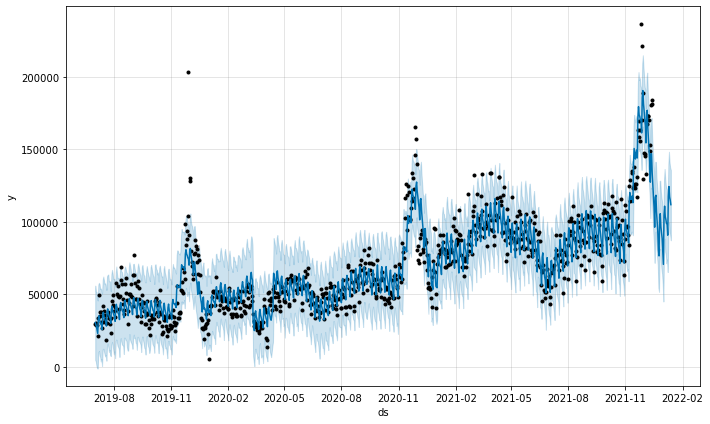

In [762]:
fig1 = m.plot(forecast)

In [690]:
import plotly.graph_objs as go

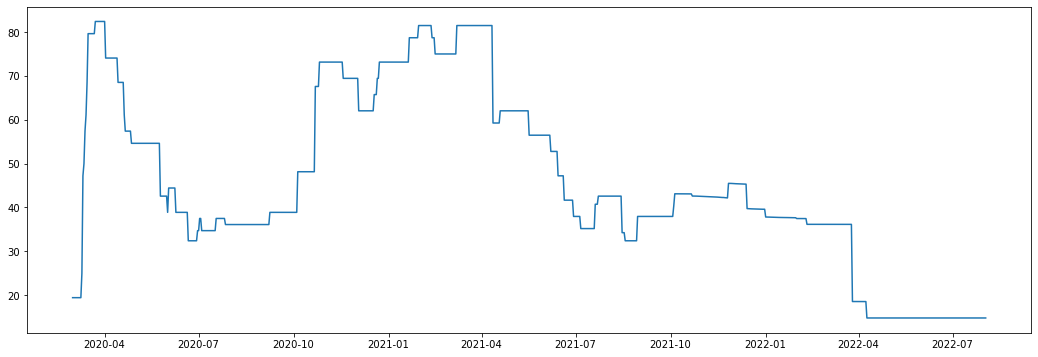

In [689]:
plt.figure(figsize=(18, 6))
plt.plot(restriction_index['ds'],restriction_index['stringency_index'])

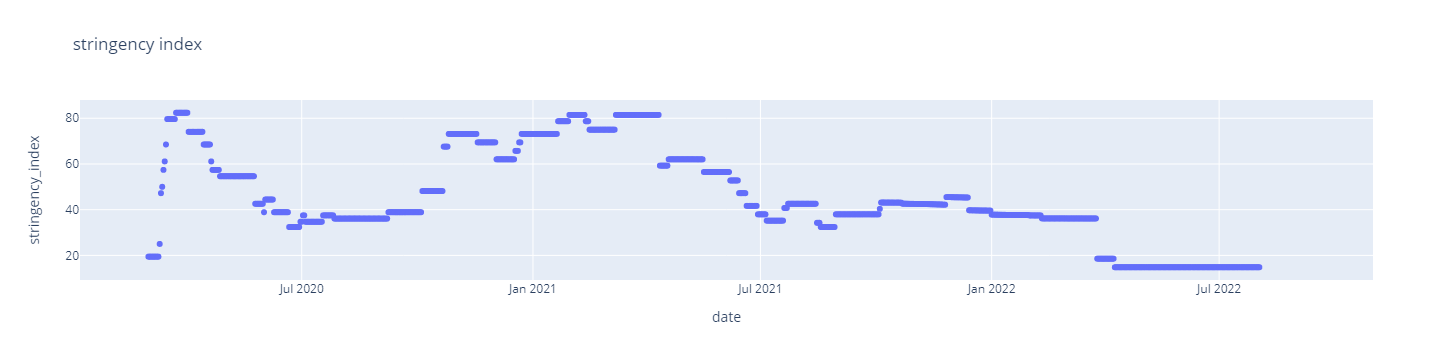

In [692]:
# define a data variable
data = [go.Scatter(
    x = restriction_index['ds'],
    y = restriction_index['stringency_index'],
    mode = 'markers',
)]
# define the layout, include a title and axis labels
layout = go.Layout(
    title = 'stringency index', # Graph title
    xaxis = dict(title = 'date'), # x-axis label
    yaxis = dict(title = 'stringency_index'), # y-axis label
    hovermode ='closest') # handles multiple points landing on the same vertical
# Create a fig from the data and layout. Then plot the fig
fig = go.Figure(data=data, layout=layout)
fig.show()

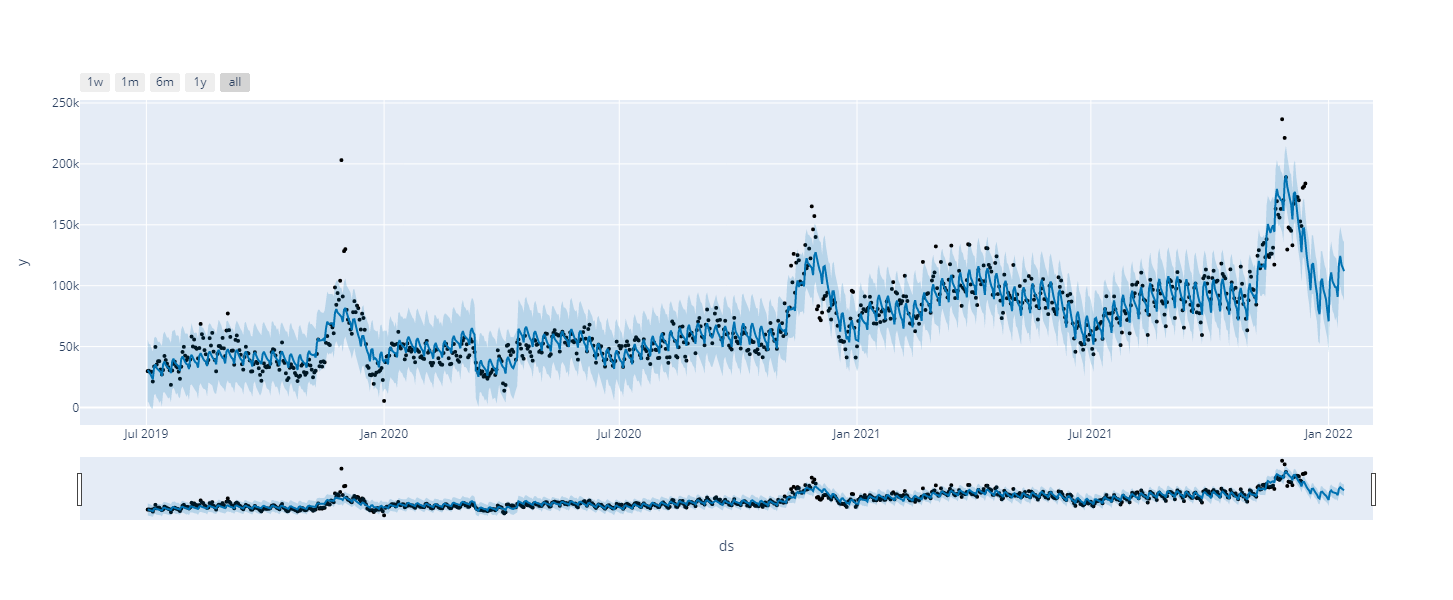

In [763]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

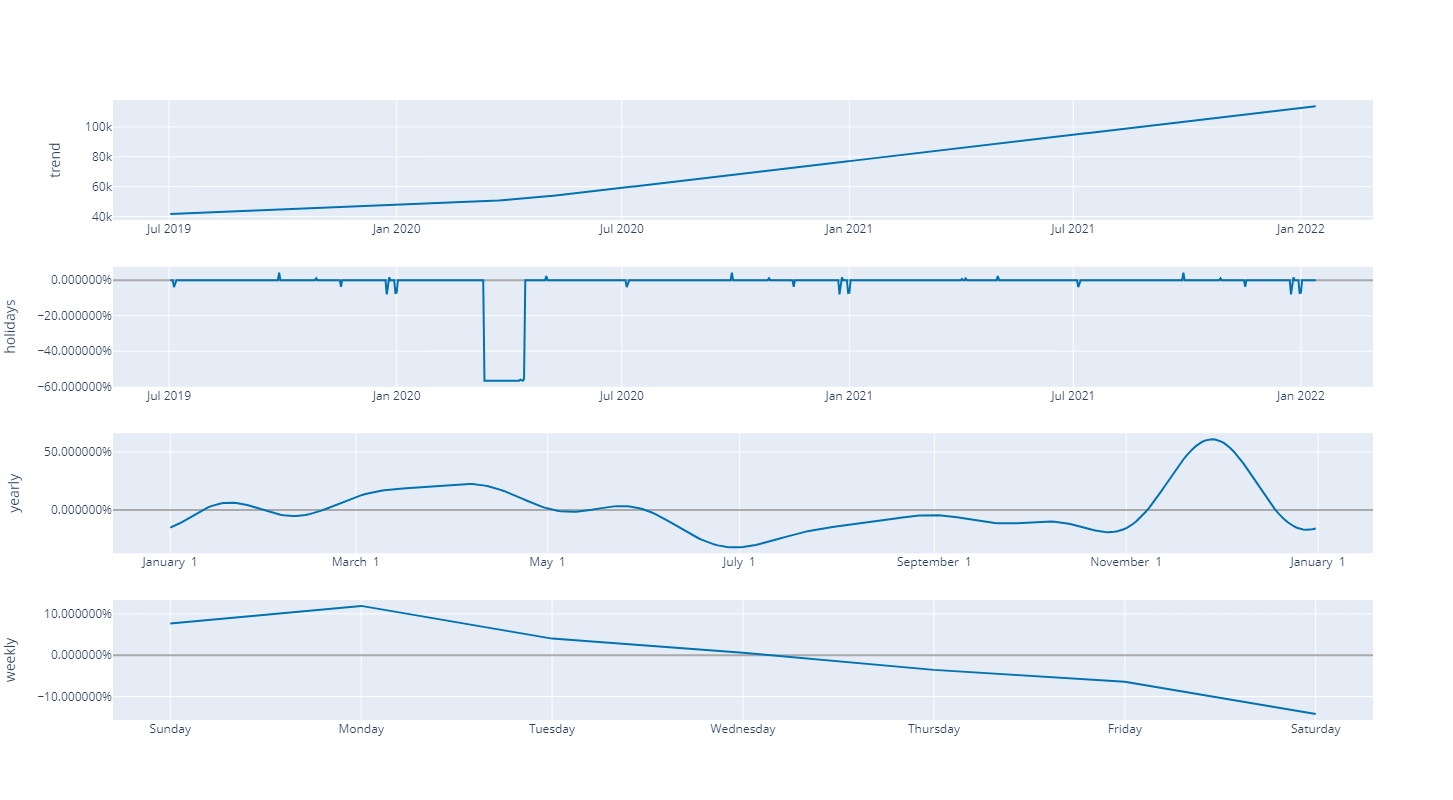

In [749]:
plot_components_plotly(m, forecast)

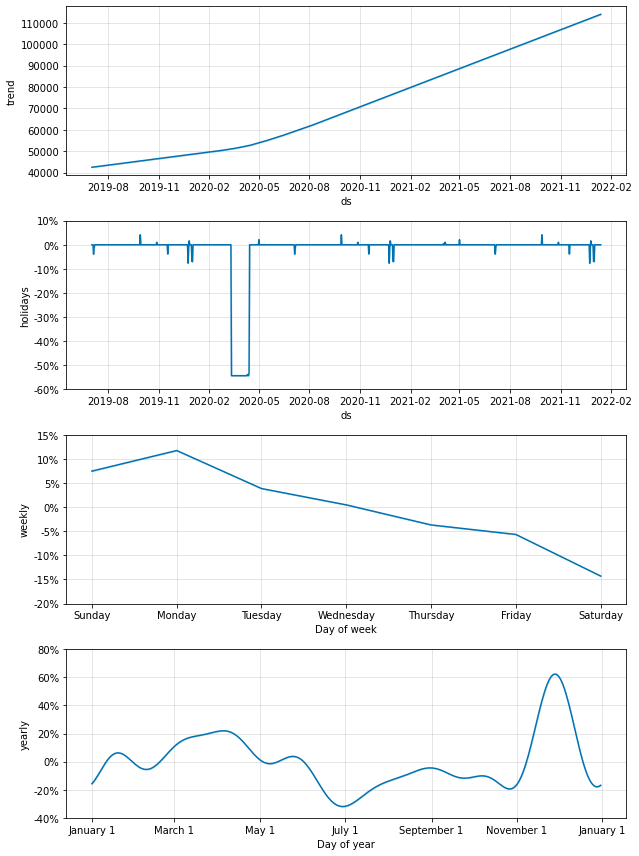

In [764]:
fig2 = m.plot_components(forecast)

In [544]:
from sklearn.metrics import mean_squared_error

In [772]:
y_pred = forecast['yhat'][-30:]
y_test = test['y']


18400.238430663532

In [766]:
np.sqrt(mean_squared_error(y_test, y_pred))

18400.238430663532

In [769]:
#np.sqrt(mean_squared_error(pdfor['y'], forecast['yhat']))

In [767]:
y_predw = forecast[['ds','yhat']][-30:]
y_predw['ds']=  pd.to_datetime(y_predw['ds'])
y_predw = y_predw.groupby(y_predw.ds.dt.week)['yhat'].sum()
test['ds']=  pd.to_datetime(test['ds'])
y_testw = test.groupby(test.ds.dt.week)['y'].sum()

C:\Users\Alex\AppData\Local\Temp\ipykernel_116004\2623388853.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

C:\Users\Alex\AppData\Local\Temp\ipykernel_116004\2623388853.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alex\AppData\Local\Temp\ipykernel_116004\2623388853.py:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [768]:
np.sqrt(mean_squared_error(y_testw[1:-1], y_predw[1:-1]))

72660.47496486914

In [281]:
y_pred

814    102130.350319
815    100378.703218
816     98073.029437
817     96848.481243
818     93105.142356
           ...      
953    120728.453213
954    117948.223815
955    116226.677741
956    113810.100719
957    112339.850590
Name: yhat, Length: 144, dtype: float64

In [282]:
y_test

814     93589.927443
815     87205.520674
816     85311.832409
817     76244.324214
818     66666.461908
           ...      
953    107064.467839
954    110698.874419
955    100503.117963
956     97576.039846
957      3095.727812
Name: y, Length: 144, dtype: float64

In [384]:
sales_cat = sales.groupby(['group0_id','date']).sum()

In [391]:
footwear = sales_cat.loc[100]
apparel = sales_cat.loc[200]
equipment = sales_cat.loc[300]
nutrition = sales_cat.loc[400]

In [392]:
footwear.head()

,order_id,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,brand_id,group1_id,group2_id,sales
date,,,,,,,,,,
2019-06-01,45601895800,25,0.0,1967.761364,1129.836434,2786.976742,2338,2997.0,246.0,2020.936876
2019-06-03,17100734610,9,0.0,776.839584,474.708915,1165.562936,767,1109.0,114.0,776.839584
2019-06-04,1170449662565,616,0.0,46349.443132,27581.624031,36477.438125,55762,87845.0,11530.0,46349.443132
2019-06-05,1079246012257,571,0.0,40931.700743,12726.181008,0.000000,51904,75273.0,5770.0,41022.257283
2019-06-06,311613564009,164,0.0,11865.065623,5638.390310,60.830233,14755,23006.0,1778.0,11865.065623


In [403]:
from datetime import date
import holidays

In [405]:
holidays.CZ(years = 2021)


{datetime.date(2021, 1, 1): 'Den obnovy samostatného českého státu', datetime.date(2021, 4, 2): 'Velký pátek', datetime.date(2021, 4, 5): 'Velikonoční pondělí', datetime.date(2021, 5, 1): 'Svátek práce', datetime.date(2021, 5, 8): 'Den vítězství', datetime.date(2021, 7, 5): 'Den slovanských věrozvěstů Cyrila a Metoděje', datetime.date(2021, 7, 6): 'Den upálení mistra Jana Husa', datetime.date(2021, 9, 28): 'Den české státnosti', datetime.date(2021, 10, 28): 'Den vzniku samostatného československého státu', datetime.date(2021, 11, 17): 'Den boje za svobodu a demokracii', datetime.date(2021, 12, 24): 'Štědrý den', datetime.date(2021, 12, 25): '1. svátek vánoční', datetime.date(2021, 12, 26): '2. svátek vánoční'}

In [462]:
m.train_holiday_names


0                                                nye
1                                     covid_lockdown
2              Den obnovy samostatného českého státu
3                                        Velký pátek
4                                Velikonoční pondělí
5                                       Svátek práce
6                                      Den vítězství
7       Den slovanských věrozvěstů Cyrila a Metoděje
8                       Den upálení mistra Jana Husa
9                                Den české státnosti
10    Den vzniku samostatného československého státu
11                  Den boje za svobodu a demokracii
12                                        Štědrý den
13                                 1. svátek vánoční
14                                 2. svátek vánoční
dtype: object

In [467]:
import itertools
from prophet.diagnostics import performance_metrics, cross_validation

In [723]:
param_grid = {
    'changepoint_prior_scale': [0.005, 0.01, 0.05, 0.1],
    'seasonality_prior_scale': [0.05, 0.1, 0.5, 1],
    'holidays_prior_scale': [0.05, 0.1, 0.5],
    #'seasonality_mode': ['additive', 'multiplicative']
}

#'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}

In [724]:
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

In [ ]:
# Use cross validation to evaluate all parameters
rmses = [] 
for params in all_params:
    m = Prophet(**params, holidays=holidays, seasonality_mode ='multiplicative')
    m.add_country_holidays(country_name='CZ')
    m.fit(train)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

17:58:22 - cmdstanpy - INFO - Chain [1] start processing
17:58:22 - cmdstanpy - INFO - Chain [1] done processing
17:58:36 - cmdstanpy - INFO - Chain [1] start processing
17:58:36 - cmdstanpy - INFO - Chain [1] done processing
17:58:49 - cmdstanpy - INFO - Chain [1] start processing
17:58:49 - cmdstanpy - INFO - Chain [1] done processing
17:59:03 - cmdstanpy - INFO - Chain [1] start processing
17:59:03 - cmdstanpy - INFO - Chain [1] done processing
17:59:18 - cmdstanpy - INFO - Chain [1] start processing
17:59:18 - cmdstanpy - INFO - Chain [1] done processing
17:59:32 - cmdstanpy - INFO - Chain [1] start processing
17:59:32 - cmdstanpy - INFO - Chain [1] done processing
17:59:45 - cmdstanpy - INFO - Chain [1] start processing
17:59:46 - cmdstanpy - INFO - Chain [1] done processing
18:00:00 - cmdstanpy - INFO - Chain [1] start processing
18:00:00 - cmdstanpy - INFO - Chain [1] done processing
18:00:14 - cmdstanpy - INFO - Chain [1] start processing
18:00:14 - cmdstanpy - INFO - Chain [1]

In [770]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.05, 'holidays_prior_scale': 0.5}
